In [251]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [252]:
Comp_D = pd.read_csv("Company_Data.csv")
Comp_D.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [253]:
Comp_D.shape

(400, 11)

In [254]:
Comp_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [255]:
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [256]:
Comp_D.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [257]:
Comp_D.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [258]:
# Null values in dataset
Comp_D.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [259]:
Comp_D['Sales'].mean()

7.496325

In [261]:
# to convert continuous variables into categorical variable use for loop, sales<=7.49 = Low, sales>7.49 = High
sales_val = []
for value in Comp_D["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
Comp_D["Sales_val"]=sales_val

In [262]:
Comp_D['Sales_val']

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: Sales_val, Length: 400, dtype: object

In [263]:
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_val'],
      dtype='object')

In [264]:
# Dropping duplicate columns
Comp_D.drop('Sales', axis = 1, inplace = True)

# Visualization

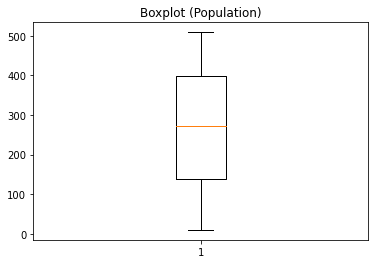

In [265]:
# Boxplot for outlier detection
plt.boxplot(Comp_D['Population']); plt.title("Boxplot (Population)")
plt.show()

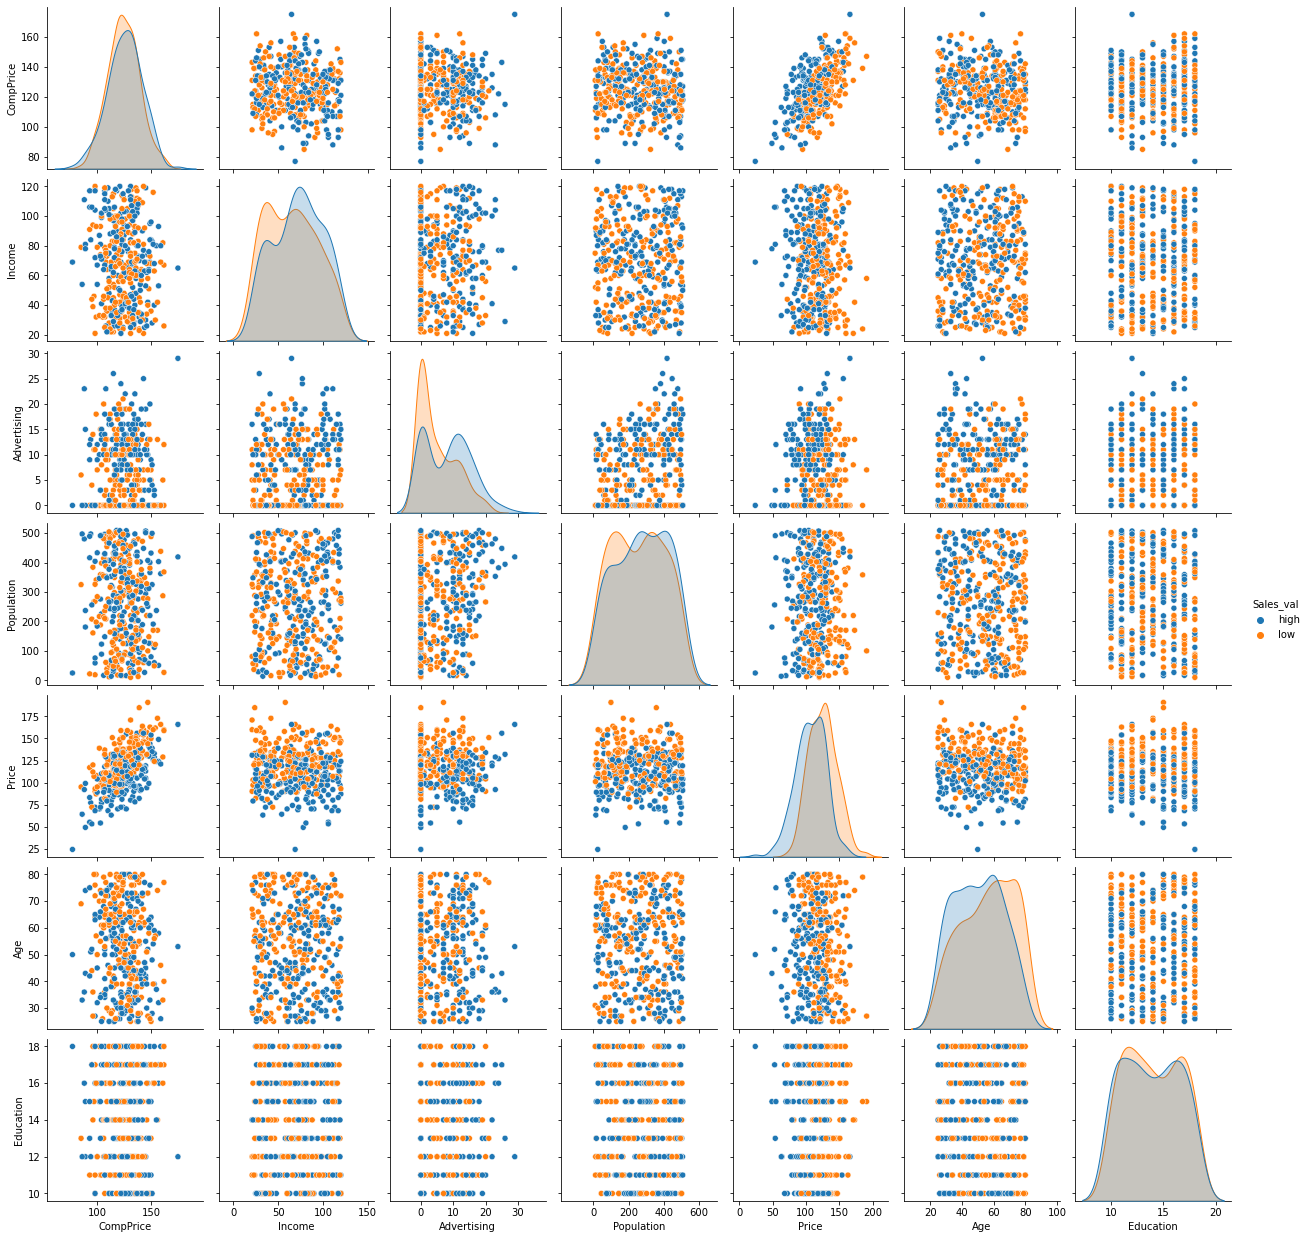

In [266]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data= Comp_D, hue = 'Sales_val' )
plt.show()

In [267]:
print(Comp_D['US'].unique())
print(Comp_D['ShelveLoc'].unique())
print(Comp_D['Urban'].unique())
print(Comp_D['Sales_val'].unique())

['Yes' 'No']
['Bad' 'Good' 'Medium']
['Yes' 'No']
['high' 'low']


In [268]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Comp_D['US'] = LE.fit_transform(Comp_D['US'])
Comp_D['ShelveLoc'] = LE.fit_transform(Comp_D['ShelveLoc'])
Comp_D['Urban'] = LE.fit_transform(Comp_D['Urban'])
Comp_D['Sales_val'] = LE.fit_transform(Comp_D['Sales_val'])

In [269]:
print(Comp_D['US'].value_counts())
print(Comp_D['ShelveLoc'].value_counts())
print(Comp_D['Urban'].value_counts())
print(Comp_D['Sales_val'].value_counts())

1    258
0    142
Name: US, dtype: int64
2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
1    282
0    118
Name: Urban, dtype: int64
1    201
0    199
Name: Sales_val, dtype: int64


In [270]:
Comp_D.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_val'],
      dtype='object')

# Model Building ,Training ,Testing

In [271]:
x = Comp_D.iloc[:,:-1]
y = Comp_D.iloc[:,-1]

In [272]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [273]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [275]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

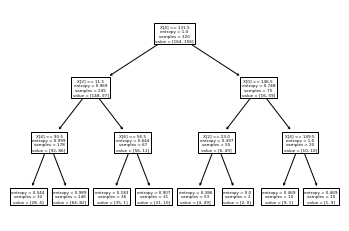

In [276]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [277]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

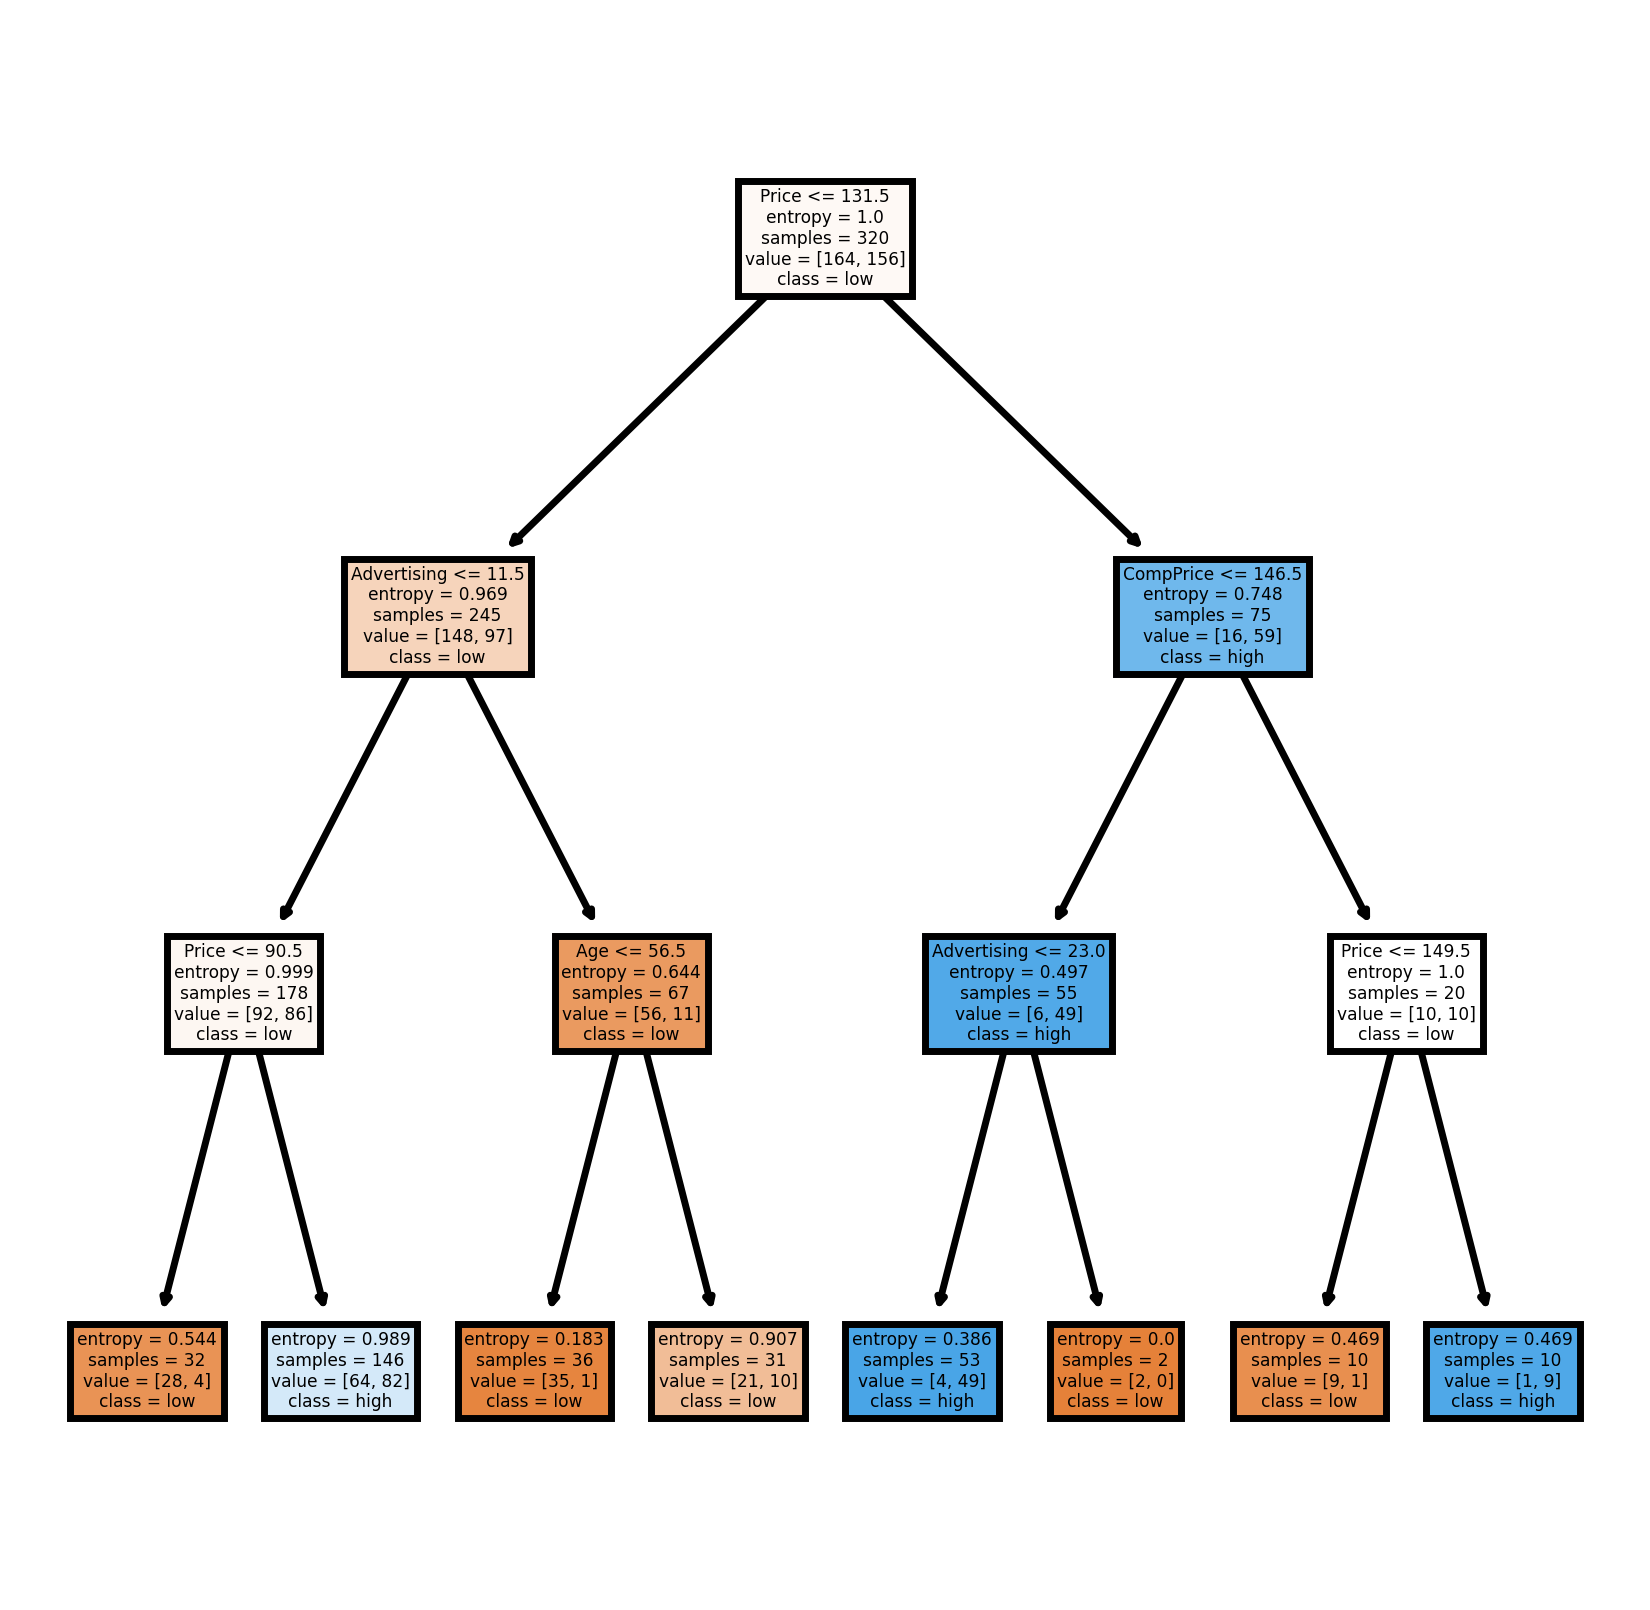

In [278]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']   # Columns
cn = ['low', 'high']   # value_counts.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [279]:
# predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

1    56
0    24
dtype: int64

In [280]:
y_test.value_counts()

1    45
0    35
Name: Sales_val, dtype: int64

In [281]:
preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [282]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_val,,
0,17,18
1,7,38


In [283]:
preds,y_test

(array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]),
 132    0
 390    1
 310    0
 3      1
 248    1
       ..
 361    0
 197    1
 23     1
 54     1
 58     1
 Name: Sales_val, Length: 80, dtype: int32)

In [284]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds==y_test), accuracy_score(y_test, preds)

(0.6875, 0.6875)

# Building Decision tree Classifier (CART) using Gini Criteria

In [285]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [286]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [287]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.6875

# Decision Tree Regression Example

In [288]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [289]:
array = Comp_D.values
X = array[:,:-1]
Y = array[:,-1]

In [290]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [291]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [293]:
# Find the accuracy
model.score(X_test, Y_test)

-0.21239954075774992

# Logistic Regression

In [294]:
# Dividing dataset into input and output
X = Comp_D.iloc[:,:-1]
Y = Comp_D.iloc[:,-1]


In [295]:
from sklearn.linear_model import LogisticRegression
import pickle

In [296]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [297]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [298]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [299]:
y_pred_Comp_D = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [300]:
y_pred_Comp_D

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
395,0,0
396,1,0
397,1,0
398,1,1


In [301]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[157  42]
 [ 31 170]]


In [369]:
((157+170)/(157+42+31+170))*100

81.75

In [311]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       199
           1       0.80      0.85      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



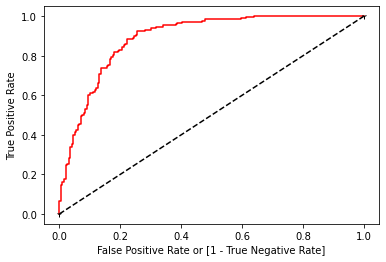

In [312]:

# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [313]:
auc    # Accuracy

0.8173579339483487

# KNN Classification

In [302]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [303]:
kfold = KFold(n_splits = 10)

In [305]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

[0.625 0.75  0.475 0.575 0.4   0.7   0.55  0.575 0.5   0.55 ]
Accuracy is: 0.5700000000000001


In [306]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [307]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [308]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [310]:
print(grid.best_score_)

0.6300000000000001


# ASSIGNMENT NO 15.(II) DECISION TREE

In [317]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [318]:
# Importing Dataset
Fraud_C=pd.read_csv("Fraud_check.csv")
Fraud_C.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [319]:
tax_inc = []
for i in Fraud_C['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
Fraud_C['tax_inc'] = tax_inc

In [320]:
Fraud_C.columns 

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [321]:
Fraud_C.drop('Taxable.Income', axis = 1, inplace = True)  # drop repeated column
Fraud_C.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [322]:
Fraud_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [323]:
# Descriptive Analysis
Fraud_C.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [324]:
Fraud_C.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_inc            0
dtype: int64

In [325]:
Fraud_C[Fraud_C.duplicated()]   # Checking duplicate columns

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc


In [326]:
# Value count in dataset
print(Fraud_C['Undergrad'].value_counts())
print(Fraud_C['Marital.Status'].value_counts())
print(Fraud_C['Urban'].value_counts())
print(Fraud_C['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [327]:
# Unique values in dataset
print(Fraud_C['Undergrad'].unique())
print(Fraud_C['Marital.Status'].unique())
print(Fraud_C['Urban'].unique())
print(Fraud_C['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [328]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Fraud_C['Undergrad'] = LE.fit_transform(Fraud_C['Undergrad'])
Fraud_C['Marital.Status'] = LE.fit_transform(Fraud_C['Marital.Status'])
Fraud_C['Urban'] = LE.fit_transform(Fraud_C['Urban'])
Fraud_C['tax_inc'] = LE.fit_transform(Fraud_C['tax_inc'])

In [329]:
Fraud_C.info()   # Check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   tax_inc          600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [330]:
Fraud_C.corr()   # Finding correlation

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


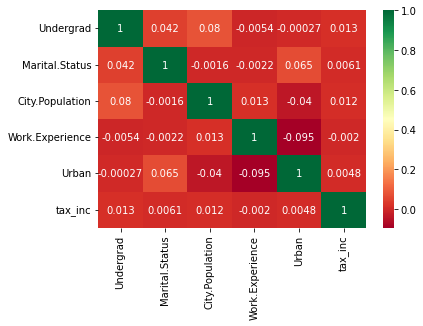

In [331]:
sns.heatmap(Fraud_C.corr(), cmap = "RdYlGn", annot = True)
plt.show()

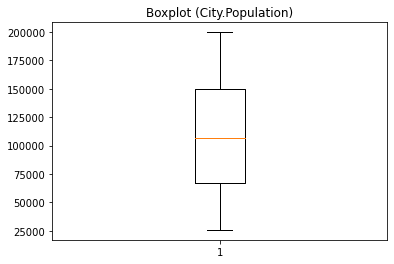

In [332]:
# Boxplot for outlier detection
plt.boxplot(Fraud_C['City.Population']); plt.title("Boxplot (City.Population)")
plt.show()

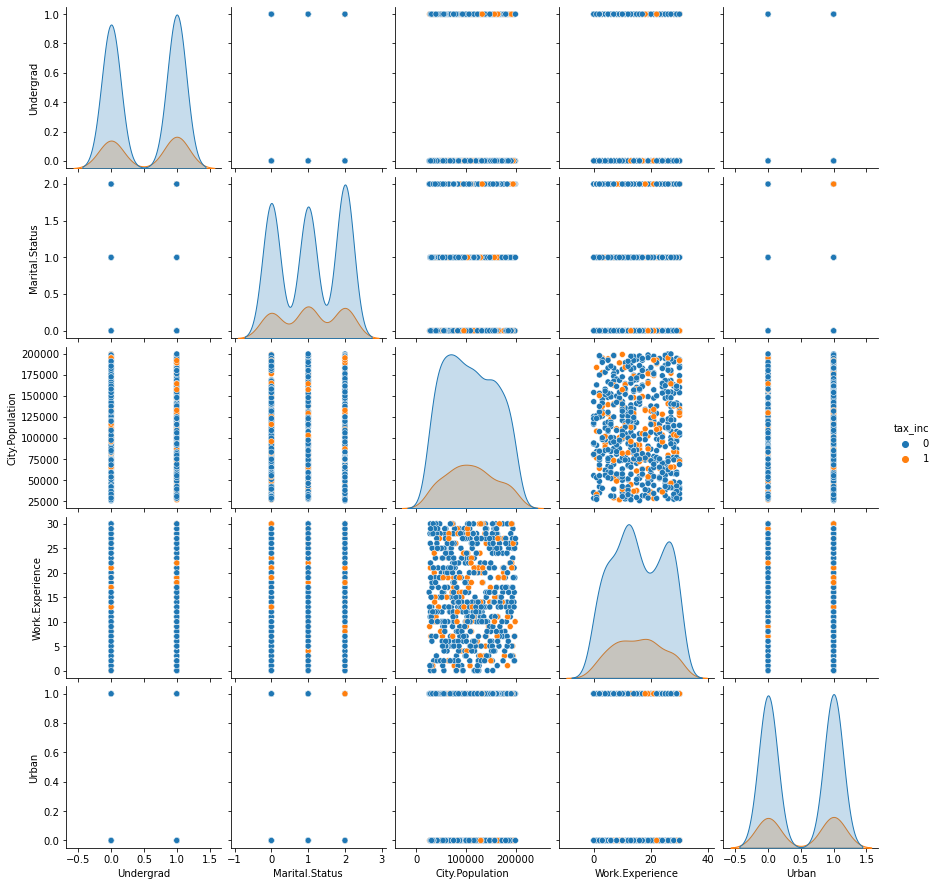

In [333]:
# Plotting pairplot for visualize all the attributes in one plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Fraud_C, hue = 'tax_inc')
plt.show()

# Model Building , Training and Testing

In [334]:
x = Fraud_C.iloc[:,:-1]
y = Fraud_C.iloc[:,-1]
#print(x)
#print(y)

In [335]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state=40)

# Building Decision Tree Classifier Using Entropy Criteria

In [336]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [337]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

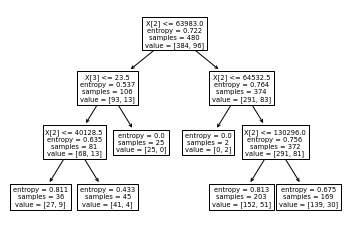

In [338]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [339]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [340]:
Fraud_C.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [341]:
Fraud_C['tax_inc'].value_counts()

0    476
1    124
Name: tax_inc, dtype: int64

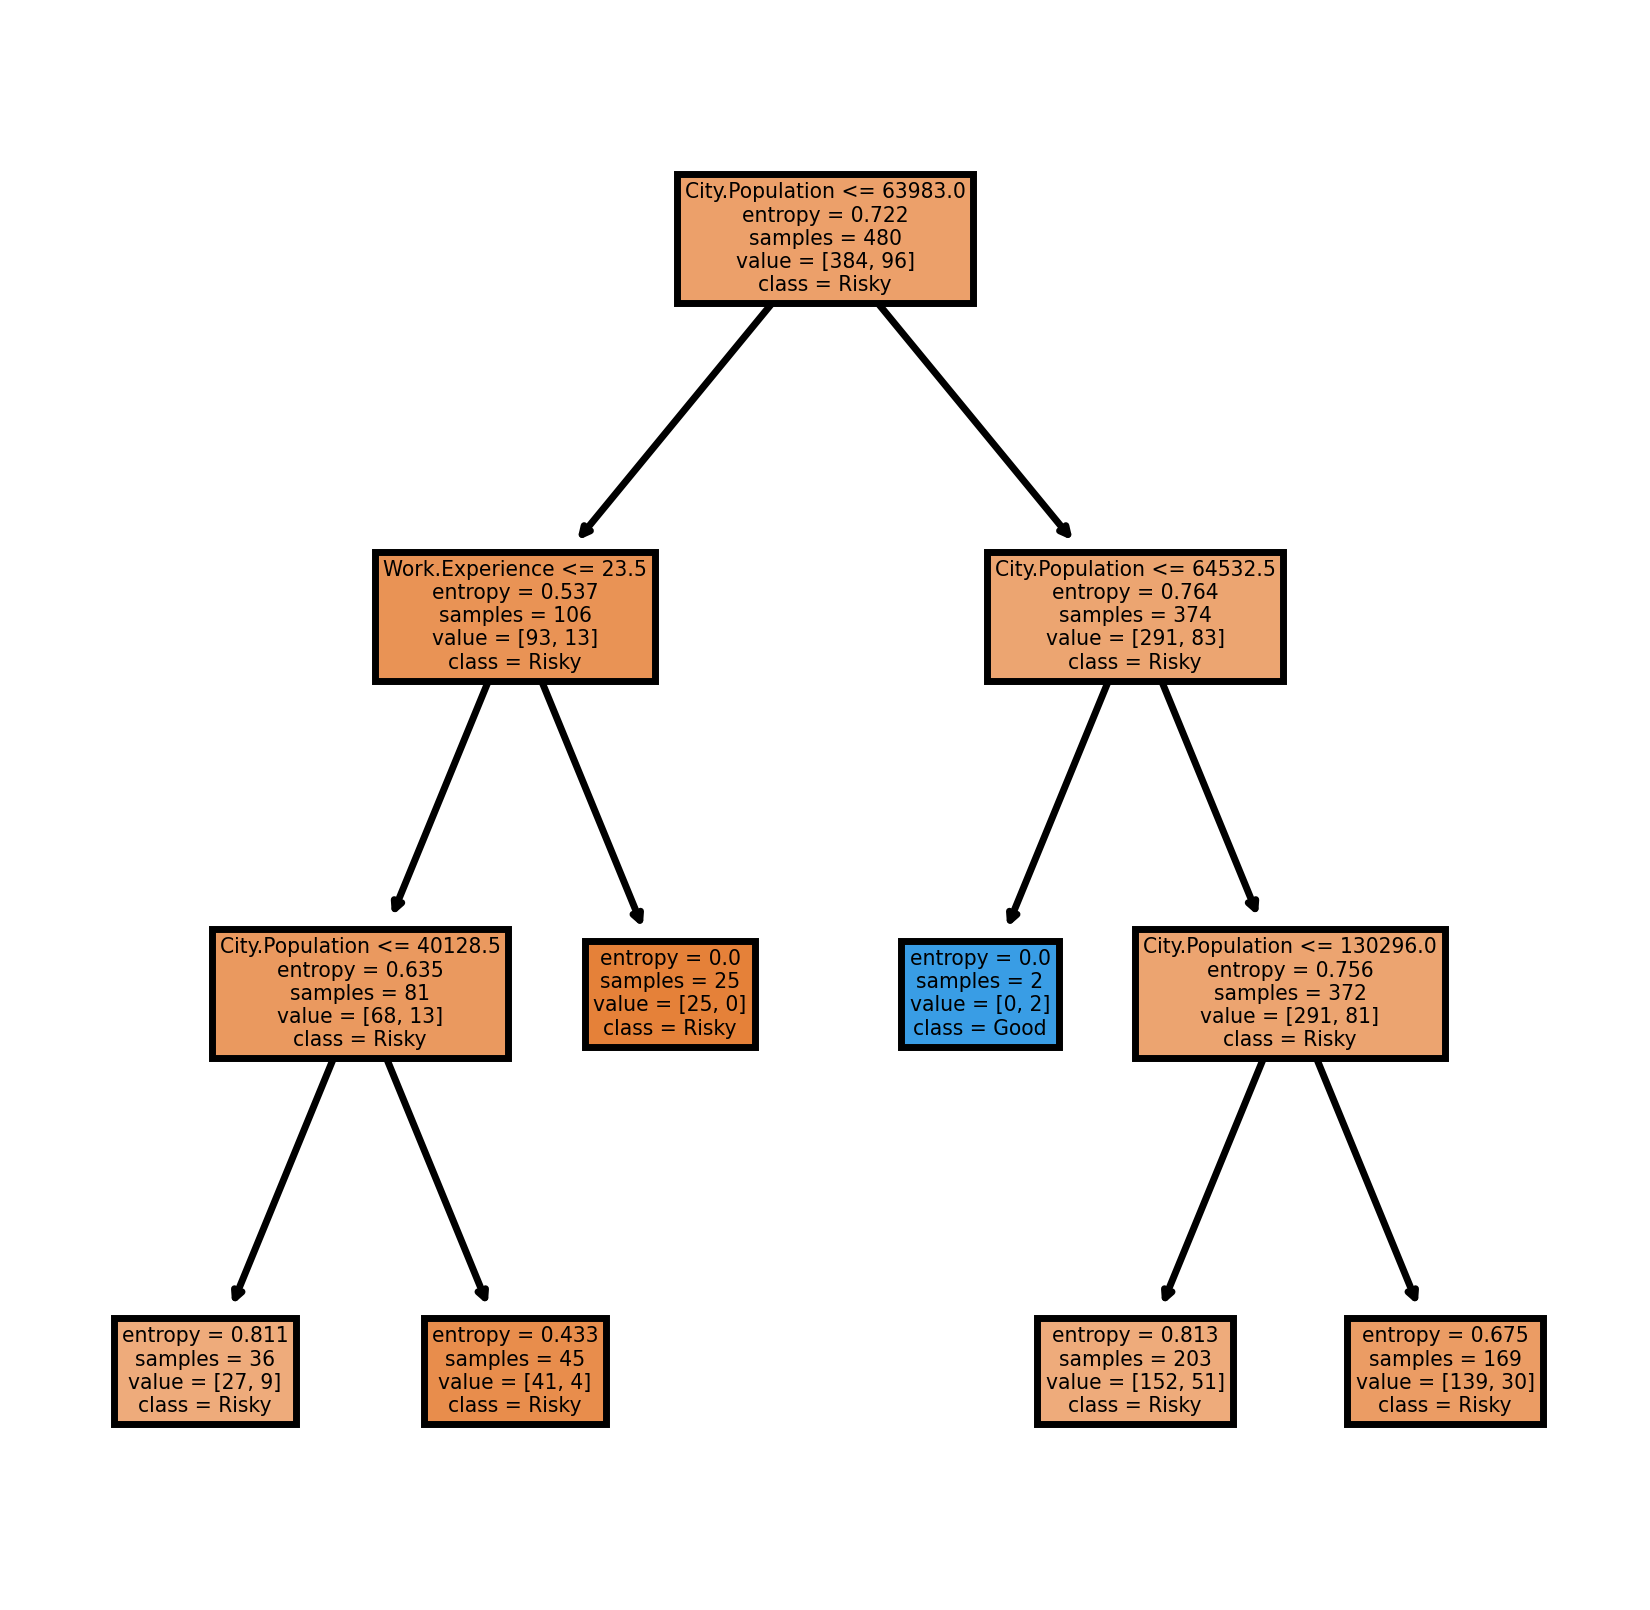

In [342]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [343]:
# Predicting on test data
preds = model.predict(x_test)     # predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

0    120
dtype: int64

In [344]:
y_test.value_counts()

0    92
1    28
Name: tax_inc, dtype: int64

In [345]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [346]:
pd.crosstab(y_test, preds)

col_0,0
tax_inc,
0,92
1,28


In [347]:
preds, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 159    0
 307    0
 253    0
 528    0
 137    1
       ..
 102    0
 577    0
 18     0
 560    0
 62     0
 Name: tax_inc, Length: 120, dtype: int32)

In [348]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(0.7666666666666667, 0.7666666666666667)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [349]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [350]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [351]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.7666666666666667

 # Decision Tree Regression Example

In [352]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [353]:
array = Fraud_C.values
X = array[:,:-1]
Y = array[:,-1]

In [354]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [355]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [356]:
# Find The accuracy
model.score(X_test, Y_test)

-1.0677215189873421

 # Logistic Regression

In [357]:
from sklearn.linear_model import LogisticRegression
import pickle

In [358]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [359]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [360]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)


In [361]:
y_pred_Fraud_C = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [362]:
y_pred_Fraud_C

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
595,0,0
596,0,0
597,0,0
598,0,0


In [363]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[476   0]
 [124   0]]


In [364]:
((476+0)/(476+0+124+0))*100

79.33333333333333

In [365]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       476
           1       0.00      0.00      0.00       124

    accuracy                           0.79       600
   macro avg       0.40      0.50      0.44       600
weighted avg       0.63      0.79      0.70       600



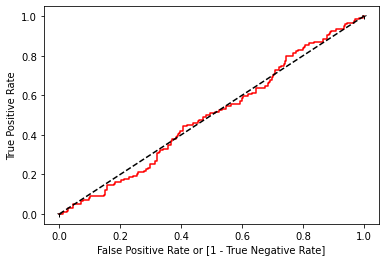

In [366]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [367]:
auc

0.5

# KNN Classification

In [142]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [143]:
kfold = KFold(n_splits = 10)

In [144]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())


[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]
Accuracy is: 0.7933333333333332


# Grid Search for algorithm tuning

In [139]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [140]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [145]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [146]:
print(grid.best_score_)

0.7933333333333332
